In [1]:
import pandas as pd
import pickle
import datetime as dt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [2]:
#from LogIn import LogIn
#kite = LogIn().return_kite_obj()

In [3]:
budget_df = pd.read_csv('budget_new.csv')

In [4]:
budget_df = budget_df[budget_df['instrument']!='NSE:MRF']

In [5]:
budget_df['return'] = 0.05

In [6]:
budget_df['budget'] = 25000

In [7]:
budget_df

,instrument,budget,return
0,NSE:ACCELYA,25000,0.05
1,NSE:GOLDBEES,25000,0.05
2,NSE:GOLDSHARE,25000,0.05
3,NSE:NIFTYBEES,25000,0.05
4,NSE:POWERGRID,25000,0.05
5,NSE:WIPRO,25000,0.05
6,NSE:BIOCON,25000,0.05
7,NSE:COLPAL,25000,0.05
8,NSE:WABCOINDIA,25000,0.05
9,NSE:ASIANPAINT,25000,0.05


# Inputs

In [8]:
begin = "2015-02-01"
end = "2020-05-31"

In [9]:
leverage = 15
exit_time = dt.time(15, 10)

# Process

In [10]:
import datetime

# borrowed from https://stackoverflow.com/a/13565185
# as noted there, the calendar module has a function of its own
def last_day_of_month(any_day):
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)  # this will never fail
    return next_month - datetime.timedelta(days=next_month.day)

def monthlist(begin,end):
    begin = datetime.datetime.strptime(begin, "%Y-%m-%d")
    end = datetime.datetime.strptime(end, "%Y-%m-%d")

    result = []
    while True:
        if begin.month == 12:
            next_month = begin.replace(year=begin.year+1,month=1, day=1)
        else:
            next_month = begin.replace(month=begin.month+1, day=1)
        if next_month > end:
            break
        result.append ([begin.strftime("%Y-%m-%d"),last_day_of_month(begin).strftime("%Y-%m-%d")])
        begin = next_month
    result.append ([begin.strftime("%Y-%m-%d"),end.strftime("%Y-%m-%d")])
    return result


date_list = monthlist(begin,end)

In [11]:
def get_clean_data(instrument):
    
    print(instrument)

    all_data_df = pd.DataFrame()

    for time_range in date_list:
        print(time_range)

        from_date = time_range[0]
        to_date = time_range[1]

        data_df = pd.read_pickle('./data_new/{}_{}_{}.pkl'.format(instrument, from_date, to_date))

        data_df.rename(columns={'date':'timestamp'}, inplace=True)
        data_df['date'] = data_df['timestamp'].dt.date
        data_df['day'] = data_df['timestamp'].dt.day_name()
        print(len(data_df))

        sanity_check = data_df.groupby('date').count().reset_index()
        incomplete_data_days = sanity_check[sanity_check['volume']<300]
        print(len(incomplete_data_days))

        data_df = data_df[~data_df['date'].isin(incomplete_data_days.date.tolist())]
        data_df['instrument'] = instrument
        print(len(data_df)/375)

        all_data_df = all_data_df.append(data_df, ignore_index=True)

    return all_data_df

In [12]:
header_list = ['instrument', 'high_prev', 'low_prev', 'open_today', 'condition', 'transaction_type', 'trade_number', 'level', 'budget', 'return', 'daily_khwab', 'actual_khwab', 'quantity', 'budget_required', 'price', 'trigger_price', 'squareoff', 'stoploss', 'order_id', 'timestamp', 'order_type', 'status', 'profit', 'pl_tag', 'flag', 'adhoora_khwab']


In [13]:
calculate = True

if calculate:
    
    all_trades = pd.DataFrame(columns=header_list)

    for instrument in budget_df.instrument.tolist():

        try:
            all_data_df = get_clean_data(instrument)

            for i in range(len(all_data_df.date.unique().tolist())-1):

                date_prev = all_data_df.date.unique().tolist()[i]
                data_prev = all_data_df[all_data_df['date']==date_prev]
                open_prev = data_prev.open.iloc[0]
                close_prev = data_prev.open.iloc[-1]
                high_prev = data_prev.high.max()
                low_prev = data_prev.low.min()

                date_today = all_data_df.date.unique().tolist()[i+1]
                data_today = all_data_df[all_data_df['date']==date_today]

                # Trim beyond exit time
                data_today = data_today[data_today['timestamp'].dt.time<exit_time]
                open_today = data_today.open.iloc[0]

                if (open_today > high_prev) & (open_today < 1.15 * high_prev):

                    condition = 'high'
                    transaction_type = 'sell'

                elif (open_today < low_prev) & (open_today > 0.85 * low_prev):

                    condition = 'low'
                    transaction_type = 'buy'

                else:

                    condition = None
                    transaction_type = None

                if condition is not None:

                    valid_trades = all_trades[(all_trades['instrument']==instrument) & (all_trades['condition']==condition) & (all_trades['status']=='complete')]
                    last_valid_trade = valid_trades[valid_trades['trade_number']==valid_trades['trade_number'].max()]

                    # Calculate trade number
                    if len(last_valid_trade):
                        trade_number = int(last_valid_trade['trade_number']) + 1
                    else:
                        trade_number = 1
                    
                    # Calculate level
                    if len(last_valid_trade):
                        if float(last_valid_trade['pl_tag'])==1.0:
                            level = 1
                        else:
                            level = float(last_valid_trade['level']) + 1
                    else:
                        level = 1

                    # Calculate budget and return
                    if level==1:
                        budget = float(budget_df[budget_df['instrument']==instrument]['budget'])
                        return_ = float(budget_df[budget_df['instrument']==instrument]['return'])
                    else:
                        budget = float(last_valid_trade['budget'])
                        return_ = float(last_valid_trade['return'])

                    # Calculate daily khwab
                    if len(last_valid_trade):
                        if int(last_valid_trade['pl_tag'])==1:
                            daily_khwab = round(return_ * budget, 2)
                        else:
                            daily_khwab = 0
                    else:
                        daily_khwab = round(return_ * budget, 2)

                    # Calculate actual khwab
                    if len(last_valid_trade):
                        actual_khwab = max(round(float(last_valid_trade['adhoora_khwab']) + daily_khwab, 2), round(return_ * budget, 2))
                    else:
                        actual_khwab = round(return_ * budget, 2)

                    # Caluclate tax
                    if actual_khwab > 5 * (round(return_ * budget, 2)):
                        factor = 1.5
                    else:
                        factor = 3
                        
                    tax = factor * (0.0005647 * actual_khwab)/return_
                    actual_khwab = round(actual_khwab + tax, 2)
                    
                    # Calculate quantity
                    quantity = int(round(actual_khwab/(return_ * open_today)))

                    # Calculate budget required
                    budget_required = round(quantity * open_today, 2)

                    # Calculate price and trigger price
                    if transaction_type=='buy':
                        price = round(open_today + 0.05 * max(round(20 * 0.010 * open_today), 2), 2)
                        trigger_price = round(open_today + 0.05 * max(round(20 * 0.009 * open_today),1), 2)
                    else:
                        price = round(open_today - 0.05 * max(round(20 * 0.010 * open_today), 2), 2)
                        trigger_price = round(open_today - 0.05 * max(round(20 * 0.009 * open_today),1), 2)

                    # Calculate square off and stoploss
                    squareoff = round(return_ * price, 1)
                    stoploss = round(return_ * price, 1)

                    # Calculate order_id, order_type
                    order_id = trade_number
                    order_type = 'SL'

                    # Calculate timestamp, status and profit
                    if transaction_type=='buy':
                        
                        if data_today.high.max() < trigger_price:

                            timestamp = data_today.timestamp.iloc[0]
                            status = 'incomplete'
                            profit = 0

                        else:

                            status = 'complete'
                            for index, row in data_today.iterrows():

                                if row['high'] > price + squareoff:
                                    timestamp = row['timestamp']
                                    profit = round(squareoff * quantity, 2)
                                    break

                                elif row['low'] < price - stoploss:
                                    timestamp = row['timestamp']
                                    profit = round(-1 * stoploss * quantity, 2)
                                    break

                                else:
                                    timestamp = row['timestamp']
                                    profit = round((row['close']-price) * quantity, 2)

                    else:

                        if data_today.low.min() > trigger_price:
                            timestamp = data_today.timestamp.iloc[0]
                            status = 'incomplete'
                            profit = 0        

                        else:

                            status = 'complete'
                            for index, row in data_today.iterrows():

                                if row['low'] < price - squareoff:
                                    timestamp = row['timestamp']
                                    profit = round(squareoff * quantity, 2)
                                    break

                                elif row['high'] > price + stoploss:
                                    timestamp = row['timestamp']
                                    profit = round(-1 * stoploss * quantity, 2)
                                    break

                                else:
                                    timestamp = row['timestamp']
                                    profit = round((price - row['close']) * quantity, 2)

                    # Calculate P/L tag
                    pl_tag = round(round(float(profit), 2) / (float(squareoff) * float(quantity)), 1)

                    # Calculate flag
                    if abs(float(pl_tag))==1:
                        flag = 1
                    else:
                        flag = 0

                    # Calculate adhoora khwab
                    adhoora_khwab = round(float(actual_khwab) - profit, 2)

                    trades_today = pd.DataFrame(data={'instrument':[instrument], 
                                                      'high_prev':[high_prev], 
                                                      'low_prev':[low_prev], 
                                                      'open_today':[open_today], 
                                                      'condition':[condition], 
                                                      'transaction_type':[transaction_type], 
                                                      'trade_number':[trade_number], 
                                                      'level':[level], 
                                                      'budget':[budget], 
                                                      'return':[return_], 
                                                      'daily_khwab':[daily_khwab], 
                                                      'actual_khwab':[actual_khwab], 
                                                      'quantity':[quantity], 
                                                      'budget_required':[budget_required], 
                                                      'price':[price], 
                                                      'trigger_price':[trigger_price], 
                                                      'squareoff':[squareoff], 
                                                      'stoploss':[stoploss], 
                                                      'order_id':[order_id], 
                                                      'timestamp':[timestamp], 
                                                      'order_type':[order_type], 
                                                      'status':[status], 
                                                      'profit':[profit], 
                                                      'pl_tag':[pl_tag], 
                                                      'flag':[flag], 
                                                      'adhoora_khwab':[adhoora_khwab]
                                                     })

                    all_trades = all_trades.append(trades_today, ignore_index = True)
        except Exception as ex:
            print('Failed calculation for {} : {}'.format(instrument, ex))
            
    all_trades.to_pickle('all_trades_opp_brokerage_return_newdata_trigger9_{}_{}.pkl'.format(begin, end))
    
else:
    
    all_trades = pd.read_pickle('all_trades_opp_brokerage_return_newdata_trigger9_{}_{}.pkl'.format(begin, end))

NSE:ACCELYA
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
7842
0
20.912
['2015-04-01', '2015-04-30']
7109
0
18.957333333333334
['2015-05-01', '2015-05-31']
7494
0
19.984
['2015-06-01', '2015-06-30']
8233
0
21.954666666666668
['2015-07-01', '2015-07-31']
8568
0
22.848
['2015-08-01', '2015-08-31']
7831
0
20.882666666666665
['2015-09-01', '2015-09-30']
7442
0
19.845333333333333
['2015-10-01', '2015-10-31']
7435
0
19.826666666666668
['2015-11-01', '2015-11-30']
6752
1
17.84
['2015-12-01', '2015-12-31']
7949
1
20.504
['2016-01-01', '2016-01-31']
7017
0
18.712
['2016-02-01', '2016-02-29']
7606
1
19.576
['2016-03-01', '2016-03-31']
7203
1
18.44
['2016-04-01', '2016-04-30']
6574
0
17.530666666666665
['2016-05-01', '2016-05-31']
8196
0
21.856
['2016-06-01', '2016-06-30']
8105
0
21.613333333333333
['2016-07-01', '2016-07-31']
7397
0
19.72533333333333
['2016-08-01', '2016-08-31']
8017
0
21.378666666666668
['2016-09-01', '2016-09-30']
7459
0
19.890666666666668
['2016-10-01'

['2018-02-01', '2018-02-28']
6790
0
18.106666666666666
['2018-03-01', '2018-03-31']
6995
0
18.653333333333332
['2018-04-01', '2018-04-30']
7772
0
20.72533333333333
['2018-05-01', '2018-05-31']
8093
0
21.581333333333333
['2018-06-01', '2018-06-30']
7684
0
20.490666666666666
['2018-07-01', '2018-07-31']
8165
0
21.773333333333333
['2018-08-01', '2018-08-31']
7795
0
20.786666666666665
['2018-09-01', '2018-09-30']
6539
0
17.437333333333335
['2018-10-01', '2018-10-31']
7730
0
20.613333333333333
['2018-11-01', '2018-11-30']
7113
1
18.808
['2018-12-01', '2018-12-31']
5830
9
10.808
['2019-01-01', '2019-01-31']
4919
20
3.0
['2019-02-01', '2019-02-28']
3823
20
0.0
['2019-03-01', '2019-03-31']
3229
19
0.0
['2019-04-01', '2019-04-30']
2853
19
0.0
['2019-05-01', '2019-05-31']
3642
21
0.8826666666666667
['2019-06-01', '2019-06-30']
3948
19
0.0
['2019-07-01', '2019-07-31']
4291
23
0.0
['2019-08-01', '2019-08-31']
5198
19
0.8213333333333334
['2019-09-01', '2019-09-30']
4809
18
0.8213333333333334
['2019

0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05

['2017-03-01', '2017-03-31']
8222
0
21.925333333333334
['2017-04-01', '2017-04-30']
6739
0
17.970666666666666
['2017-05-01', '2017-05-31']
8224
0
21.930666666666667
['2017-06-01', '2017-06-30']
7841
0
20.909333333333333
['2017-07-01', '2017-07-31']
7655
1
19.933333333333334
['2017-08-01', '2017-08-31']
7824
0
20.864
['2017-09-01', '2017-09-30']
7853
0
20.941333333333333
['2017-10-01', '2017-10-31']
7154
1
18.92
['2017-11-01', '2017-11-30']
8235
0
21.96
['2017-12-01', '2017-12-31']
7442
0
19.845333333333333
['2018-01-01', '2018-01-31']
8237
0
21.965333333333334
['2018-02-01', '2018-02-28']
7115
0
18.973333333333333
['2018-03-01', '2018-03-31']
7087
0
18.898666666666667
['2018-04-01', '2018-04-30']
7845
0
20.92
['2018-05-01', '2018-05-31']
8201
0
21.869333333333334
['2018-06-01', '2018-06-30']
7848
0
20.928
['2018-07-01', '2018-07-31']
8224
0
21.930666666666667
['2018-08-01', '2018-08-31']
7836
0
20.896
['2018-09-01', '2018-09-30']
6726
0
17.936
['2018-10-01', '2018-10-31']
7839
0
20.904

['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '

6812
1
18.0
['2015-12-01', '2015-12-31']
8232
0
21.952
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['

20
0.808
['2020-04-01', '2020-04-30']
4278
18
0.0
['2020-05-01', '2020-05-31']
2696
15
0.0
NSE:NPBET
['2015-02-01', '2015-02-28']
Failed calculation for NSE:NPBET : 'timestamp'
NSE:TORNTPHARM
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
7841
0
20.909333333333333
['2015-04-01', '2015-04-30']
7121
0
18.989333333333335
['2015-05-01', '2015-05-31']
7500
0
20.0
['2015-06-01', '2015-06-30']
8250
0
22.0
['2015-07-01', '2015-07-31']
8621
0
22.989333333333335
['2015-08-01', '2015-08-31']
7871
0
20.989333333333335
['2015-09-01', '2015-09-30']
7483
0
19.954666666666668
['2015-10-01', '2015-10-31']
7500
0
20.0
['2015-11-01', '2015-11-30']
6812
1
18.0
['2015-12-01', '2015-12-31']
8227
0
21.938666666666666
['2016-01-01', '2016-01-31']
7125
0
19.0
['2016-02-01', '2016-02-29']
7875
0
21.0
['2016-03-01', '2016-03-31']
7500
0
20.0
['2016-04-01', '2016-04-30']
6750
0
18.0
['2016-05-01', '2016-05-31']
8250
0
22.0
['2016-06-01', '2016-06-30']
8250
0
22.0
['2016-07-01', '2016-07-31'

7491
0
19.976
['2019-03-01', '2019-03-31']
7120
0
18.986666666666668
['2019-04-01', '2019-04-30']
7120
0
18.986666666666668
['2019-05-01', '2019-05-31']
8247
0
21.992
['2019-06-01', '2019-06-30']
7107
0
18.952
['2019-07-01', '2019-07-31']
8606
0
22.949333333333332
['2019-08-01', '2019-08-31']
7479
0
19.944
['2019-09-01', '2019-09-30']
7102
0
18.938666666666666
['2019-10-01', '2019-10-31']
7178
1
18.981333333333332
['2019-11-01', '2019-11-30']
7497
0
19.992
['2019-12-01', '2019-12-31']
7875
0
21.0
['2020-01-01', '2020-01-31']
8625
0
23.0
['2020-02-01', '2020-02-29']
7499
0
19.997333333333334
['2020-03-01', '2020-03-31']
7757
0
20.685333333333332
['2020-04-01', '2020-04-30']
6750
0
18.0
['2020-05-01', '2020-05-31']
5625
0
15.0
NSE:BATAINDIA
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
7842
0
20.912
['2015-04-01', '2015-04-30']
7121
0
18.989333333333335
['2015-05-01', '2015-05-31']
7500
0
20.0
['2015-06-01', '2015-06-30']
8250
0
22.0
['2015-07-01', '2015-07-31']
8

0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05-01', '2019-05-31']
8247
0
21.992
['2019-06-01', '2019-06-30']
7125
0
19.0
['2019-07-01', '2019-07-31']
8625
0
23.0
['2019-08-01', '2019-08-31']
7499
0
19.997333333333334
['2019-09-01', '2019-09-30']
7110
0
18.96
['2019-10-01', '2019-10-31']
7185
1
19.0
['2019-11-01', '2019-11-30']
7500
0
20.0
['2019-12-01', '2019-12-31']
7875
0
21.0
['2020-01-01', '2020-01-31']
8625
0
23.0
['2020-02-01', '2020-02-29']
7499
0
19.997333333333334
['2020-03-01', '2020-03-31']
7757
0
20.685333333333332
['2020-04-01', '2020-04-30']
6751
0
18.002666666666666
['2020-05-01', '2020-05-31']
5625
0
15.0
NSE:MCDOWELL-N
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
7842
0
20.912
['2015-04-01', '2015-04-30']
7121
0
18.989333333333335
['2015-05-01', '2015-05-31']
7500
0
20.0
['2015-06-01', '2015-06-30']
8250
0
22.0
['2015-07-01', '2015-07-31']
8621
0
22.989

0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05-01', '2019-05-31']
8247
0
21.992
['2019-06-01', '2019-06-30']
7125
0
19.0
['2019-07-01', '2019-07-31']
8625
0
23.0
['2019-08-01', '2019-08-31']
7499
0
19.997333333333334
['2019-09-01', '2019-09-30']
7110
0
18.96
['2019-10-01', '2019-10-31']
7185
1
19.0
['2019-11-01', '2019-11-30']
7500
0
20.0
['2019-12-01', '2019-12-31']
7875
0
21.0
['2020-01-01', '2020-01-31']
8625
0
23.0
['2020-02-01', '2020-02-29']
7499
0
19.997333333333334
['2020-03-01', '2020-03-31']
7757
0
20.685333333333332
['2020-04-01', '2020-04-30']
6750
0
18.0
['2020-05-01', '2020-05-31']
5625
0
15.0
NSE:AMARAJABAT
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
78

6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05-01', '2019-05-31']
8250
0
22.0
['2019-06-01', '2019-06-30']
7125
0
19.0
['2019-07-01', '2019-07-31']
8625
0
23.0
['2019-08-01', '2019-08-31']
7499
0
19.997333333333334
['2019-09-01', '2019-09-30']
7110
0
18.96
['2019-10-01', '2019-10-31']
7185
1
19.0
['2019-11-01', '2019-11-30']
7500
0
20.0
['2019-12-01', '2019-12-31']
7875
0
21.0
['2020-01-01', '2020-01-31']
8625
0
23.0
['2020-02-01', '2020-02-29']
7499
0
19.997333333333334
['2020-03-01', '2020-03-31']
7757
0
20.685333333333332
['2020-04-01', '2020-04-30']
6751
0
18.002666666666666
['2020-05-01', '2020-05-31']
5625
0
15.0
NSE:BRITANNIA
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
7842
0
20.912
['2015-04-01'

0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05-01', '2019-05-31']
8247
0
21.992
['2019-06-01', '2019-06-30']
7125
0
19.0
['2019-07-01', '2019-07-31']
8625
0
23.0
['2019-08-01', '2019-08-31']
7499
0
19.997333333333334
['2019-09-01', '2019-09-30']
7110
0
18.96
['2019-10-01', '2019-10-31']
7185
1
19.0
['2019-11-01', '2019-11-30']
7500
0
20.0
['2019-12-01', '2019-12-31']
7875
0
21.0
['2020-01-01', '2020-01-31']
8625
0
23.0
['2020-02-01', '2020-02-29']
7499
0
19.997333333333334
['2020-03-01', '2020-03-31']
7757
0
20.685333333333332
['2020-04-01', '2020-04-30']
6750
0
18.0
['2020-05-01', '2020-05-31']
5625
0
15.0
NSE:HEROMOTOCO
['2015-02-01', '2015-02-28']
7500
0
20.0
['2015-03-01', '2015-03-31']
78

7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05-01', '2019-05-31']
8247
0
21.992
['2019-06-01', '2019-06-30']
7125
0
19.0
['2019-07-01', '2019-07-31']
8625
0
23.0
['2019-08-01', '2019-08-31']
7499
0
19.997333333333334
['2019-09-01', '2019-09-30']
7110
0
18.96
['2019-10-01', '2019-10-31']
7185
1
19.0
['2019-11-01', '2019-11-30']
7500
0
20.0
['2019-12-01', '2019-12-31']
7875
0
21.0
['2020-01-01', '2020-01-31']
8625
0
23.0
['2020-02-01', '2020-02-29']

['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8623
0
22.994666666666667
['2019-02-01', '2019-02-28']
7499
0
19.997333333333334
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '2019-04-30']
7125
0
19.0
['2019-05-01', '2019-05-31']


['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '

['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '

0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04

0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03

['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '2018-10-31']
7875
0
21.0
['2018-11-01', '2018-11-30']
7185
1
19.0
['2018-12-01', '2018-12-31']
7500
0
20.0
['2019-01-01', '2019-01-31']
8625
0
23.0
['2019-02-01', '2019-02-28']
7500
0
20.0
['2019-03-01', '2019-03-31']
7125
0
19.0
['2019-04-01', '

0
21.936
['2017-01-01', '2017-01-31']
7858
0
20.954666666666668
['2017-02-01', '2017-02-28']
7106
0
18.949333333333332
['2017-03-01', '2017-03-31']
8223
0
21.928
['2017-04-01', '2017-04-30']
6721
0
17.922666666666668
['2017-05-01', '2017-05-31']
8221
0
21.922666666666668
['2017-06-01', '2017-06-30']
7872
0
20.992
['2017-07-01', '2017-07-31']
7670
1
19.973333333333333
['2017-08-01', '2017-08-31']
7862
0
20.965333333333334
['2017-09-01', '2017-09-30']
7871
0
20.989333333333335
['2017-10-01', '2017-10-31']
7184
1
18.997333333333334
['2017-11-01', '2017-11-30']
8243
0
21.981333333333332
['2017-12-01', '2017-12-31']
7498
0
19.994666666666667
['2018-01-01', '2018-01-31']
8242
0
21.978666666666665
['2018-02-01', '2018-02-28']
7123
0
18.994666666666667
['2018-03-01', '2018-03-31']
7116
0
18.976
['2018-04-01', '2018-04-30']
7868
0
20.981333333333332
['2018-05-01', '2018-05-31']
8237
0
21.965333333333334
['2018-06-01', '2018-06-30']
7871
0
20.989333333333335
['2018-07-01', '2018-07-31']
8250
0
2

['2016-07-01', '2016-07-31']
7500
0
20.0
['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '

8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['20

['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '2018-09-30']
6750
0
18.0
['2018-10-01', '

['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '

['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '

8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['20

['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '

['2016-08-01', '2016-08-31']
8250
0
22.0
['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '

['2016-09-01', '2016-09-30']
7500
0
20.0
['2016-10-01', '2016-10-31']
6810
1
18.0
['2016-11-01', '2016-11-30']
7875
0
21.0
['2016-12-01', '2016-12-31']
8250
0
22.0
['2017-01-01', '2017-01-31']
7875
0
21.0
['2017-02-01', '2017-02-28']
7125
0
19.0
['2017-03-01', '2017-03-31']
8250
0
22.0
['2017-04-01', '2017-04-30']
6750
0
18.0
['2017-05-01', '2017-05-31']
8250
0
22.0
['2017-06-01', '2017-06-30']
7875
0
21.0
['2017-07-01', '2017-07-31']
7680
1
20.0
['2017-08-01', '2017-08-31']
7875
0
21.0
['2017-09-01', '2017-09-30']
7875
0
21.0
['2017-10-01', '2017-10-31']
7185
1
19.0
['2017-11-01', '2017-11-30']
8250
0
22.0
['2017-12-01', '2017-12-31']
7500
0
20.0
['2018-01-01', '2018-01-31']
8250
0
22.0
['2018-02-01', '2018-02-28']
7125
0
19.0
['2018-03-01', '2018-03-31']
7125
0
19.0
['2018-04-01', '2018-04-30']
7875
0
21.0
['2018-05-01', '2018-05-31']
8250
0
22.0
['2018-06-01', '2018-06-30']
7875
0
21.0
['2018-07-01', '2018-07-31']
8250
0
22.0
['2018-08-01', '2018-08-31']
7875
0
21.0
['2018-09-01', '

# High Trades Analysis

In [14]:
less_100 = all_trades[all_trades['low_prev']<100].instrument.unique().tolist()

In [15]:
len(less_100)

22

In [16]:
all_trades['new_timestamp'] = all_trades.apply(lambda s: s['timestamp'].tz_convert(None), axis=1)

In [17]:
all_trades[~all_trades['instrument'].isin(less_100)].instrument.nunique()

63

In [18]:
high_trades = all_trades[(all_trades['condition']=='high') & (all_trades['status']=='complete') & (~all_trades['instrument'].isin(less_100)) & (all_trades['new_timestamp']<pd.to_datetime('2019-12-31'))]


In [19]:
high_trades_loop = pd.DataFrame()
for instrument in high_trades.instrument.unique().tolist():
    instrument_high_trades = high_trades[high_trades['instrument']==instrument]
    instrument_high_trades_loop = instrument_high_trades[instrument_high_trades['trade_number']<=instrument_high_trades[instrument_high_trades['pl_tag']==1.0].trade_number.max()]
    high_trades_loop = high_trades_loop.append(instrument_high_trades_loop, ignore_index=True)
    

In [20]:
high_trades.head()

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,new_timestamp
1227,NSE:POWERGRID,148.85,145.00,149.30,high,sell,1,1,25000.0,0.05,1250.0,1292.35,173,25828.90,147.80,147.95,7.4,7.4,1,2015-02-12 15:09:00+05:30,SL,complete,-233.55,-0.2,0,1525.90,2015-02-12 09:39:00
1228,NSE:POWERGRID,157.50,152.15,158.35,high,sell,2,2,25000.0,0.05,0.0,1577.60,199,31511.65,156.75,156.90,7.8,7.8,2,2015-02-28 15:09:00+05:30,SL,complete,0.00,0.0,0,1577.60,2015-02-28 09:39:00
1229,NSE:POWERGRID,156.35,154.15,156.45,high,sell,3,3,25000.0,0.05,0.0,1631.05,209,32698.05,154.90,155.05,7.7,7.7,3,2015-03-04 15:09:00+05:30,SL,complete,219.45,0.1,0,1411.60,2015-03-04 09:39:00
1230,NSE:POWERGRID,151.60,147.40,151.70,high,sell,4,4,25000.0,0.05,0.0,1459.43,192,29126.40,150.20,150.35,7.5,7.5,4,2015-04-10 15:09:00+05:30,SL,complete,-480.00,-0.3,0,1939.43,2015-04-10 09:39:00
1231,NSE:POWERGRID,141.05,138.15,141.80,high,sell,5,5,25000.0,0.05,0.0,2005.14,283,40129.40,140.40,140.50,7.0,7.0,5,2015-05-08 15:09:00+05:30,SL,complete,99.05,0.0,0,1906.09,2015-05-08 09:39:00


In [21]:
high_trades.instrument.nunique()

63

In [22]:
high_trades.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ACC,4017.00,221922.50
1,NSE:AMARAJABAT,13046.55,85323.15
2,NSE:AMBUJACEM,6622.05,167862.00
3,NSE:ASIANPAINT,-11814.40,897218.00
4,NSE:AUROPHARMA,6414.15,412115.00
5,NSE:BAJAJ-AUTO,3330.20,185238.25
6,NSE:BATAINDIA,9439.89,89028.30
7,NSE:BERGEPAINT,4452.28,344501.60
8,NSE:BHARTIARTL,5881.45,90117.00
9,NSE:BOSCHLTD,-844.30,447000.00


In [23]:
high_trades_loop.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:AMARAJABAT,6610.20,75888.00
1,NSE:AUROPHARMA,12917.60,83688.20
2,NSE:BAJAJ-AUTO,6870.50,84896.00
3,NSE:BATAINDIA,3872.14,66744.50
4,NSE:BOSCHLTD,3940.35,93869.00
5,NSE:CADILAHC,7211.37,79570.00
6,NSE:COALINDIA,2185.75,70368.00
7,NSE:DIVISLAB,15290.18,1028016.00
8,NSE:DRREDDY,6184.65,153013.35
9,NSE:EICHERMOT,8857.20,236711.25


# Low Trades Analysis

In [24]:
low_trades = all_trades[(all_trades['condition']=='low') & (all_trades['status']=='complete') & (~all_trades['instrument'].isin(less_100)) & (all_trades['new_timestamp']<pd.to_datetime('2019-12-31'))]

In [25]:
low_trades_loop = pd.DataFrame()
for instrument in low_trades.instrument.unique().tolist():
    instrument_low_trades = low_trades[low_trades['instrument']==instrument]
    instrument_low_trades_loop = instrument_low_trades[instrument_low_trades['trade_number']<=instrument_low_trades[instrument_low_trades['pl_tag']==1.0].trade_number.max()]
    low_trades_loop = low_trades_loop.append(instrument_low_trades_loop, ignore_index=True)
    

In [26]:
low_trades.head()

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,new_timestamp
1226,NSE:POWERGRID,146.90,143.00,142.45,low,buy,1,1,25000.0,0.05,1250.0,1292.35,181,25783.45,143.85,143.75,7.2,7.2,1,2015-02-06 15:09:00+05:30,SL,complete,-199.10,-0.2,0,1491.45,2015-02-06 09:39:00
1235,NSE:POWERGRID,141.25,138.90,138.00,low,buy,2,2,25000.0,0.05,0.0,1541.98,223,30774.00,139.40,139.25,7.0,7.0,2,2015-06-29 15:09:00+05:30,SL,complete,11.15,0.0,0,1530.83,2015-06-29 09:39:00
1236,NSE:POWERGRID,142.95,140.60,140.50,low,buy,3,3,25000.0,0.05,0.0,1582.70,225,31612.50,141.90,141.75,7.1,7.1,3,2015-07-06 15:09:00+05:30,SL,complete,-360.00,-0.2,0,1942.70,2015-07-06 09:39:00
1239,NSE:POWERGRID,135.00,133.05,130.30,low,buy,4,4,25000.0,0.05,0.0,2008.52,308,40132.40,131.60,131.45,6.6,6.6,4,2015-08-24 15:09:00+05:30,SL,complete,261.80,0.1,0,1746.72,2015-08-24 09:39:00
1241,NSE:POWERGRID,135.45,130.15,129.70,low,buy,5,5,25000.0,0.05,0.0,1805.90,278,36056.60,131.00,130.85,6.6,6.6,5,2015-09-01 15:09:00+05:30,SL,complete,-458.70,-0.2,0,2264.60,2015-09-01 09:39:00


In [27]:
low_trades.instrument.nunique()

63

In [28]:
low_trades.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:ACC,3566.45,466268.55
1,NSE:AMARAJABAT,7552.55,87720.00
2,NSE:AMBUJACEM,9099.35,362807.50
3,NSE:ASIANPAINT,-1204.85,255185.70
4,NSE:AUROPHARMA,7006.36,267848.90
5,NSE:BAJAJ-AUTO,3495.95,122297.50
6,NSE:BATAINDIA,1059.81,95965.20
7,NSE:BERGEPAINT,2249.73,267527.50
8,NSE:BHARTIARTL,8499.25,143347.05
9,NSE:BOSCHLTD,2513.80,97985.00


In [29]:
low_trades_loop.groupby(['instrument']).agg({'profit':sum, 'budget_required':max}).reset_index()


,instrument,profit,budget_required
0,NSE:AMBUJACEM,8264.75,362807.50
1,NSE:AUROPHARMA,6205.76,48250.05
2,NSE:BATAINDIA,5833.66,72036.00
3,NSE:BERGEPAINT,2007.92,46622.30
4,NSE:BHARTIARTL,6459.30,143347.05
5,NSE:BOSCHLTD,3847.00,46100.00
6,NSE:CADILAHC,22044.15,2158824.00
7,NSE:CIPLA,2911.30,51837.00
8,NSE:COALINDIA,7621.85,160020.90
9,NSE:COLPAL,1580.05,45850.00


# Results

In [30]:
pd.DataFrame(data={'high':[len(high_trades),
                           len(high_trades_loop),
                           round(high_trades_loop.profit.sum(), 2), 
                           round(high_trades_loop.profit.sum()/budget_df.budget.sum() * 100, 2),
                           round(high_trades_loop.budget_required.max()), 
                           round(high_trades_loop.budget_required.max()/leverage)],
                   'low':[len(low_trades),
                          len(low_trades_loop),
                          round(low_trades_loop.profit.sum(), 2), 
                          round(low_trades_loop.profit.sum()/budget_df.budget.sum() * 100, 2),
                          round(low_trades_loop.budget_required.max()),
                          round(low_trades_loop.budget_required.max()/leverage)]
                   }, 
             index = ['total_trades', 'trades_considered', 'profit', 'perc_return', 'hightest_budget_required', 'hightest_margin_required'])

,high,low
total_trades,4465.00,2791.00
trades_considered,1489.00,1272.00
profit,281234.14,351151.58
perc_return,12.50,15.61
hightest_budget_required,1028016.00,9155486.00
hightest_margin_required,68534.00,610366.00


In [31]:
pd.DataFrame(data={'high':[len(high_trades),
                           len(high_trades),
                           round(high_trades.profit.sum(), 2), 
                           round(high_trades.profit.sum()/budget_df.budget.sum() * 100, 2),
                           round(high_trades.budget_required.max()), 
                           round(high_trades.budget_required.max()/leverage)],
                   'low':[len(low_trades),
                          len(low_trades),
                          round(low_trades.profit.sum(), 2), 
                          round(low_trades.profit.sum()/budget_df.budget.sum() * 100, 2),
                          round(low_trades.budget_required.max()),
                          round(low_trades.budget_required.max()/leverage)]
                   }, 
             index = ['total_trades', 'trades_considered', 'profit', 'perc_return', 'hightest_budget_required', 'hightest_margin_required'])

,high,low
total_trades,4465.00,2791.00
trades_considered,4465.00,2791.00
profit,298253.23,328689.85
perc_return,13.26,14.61
hightest_budget_required,1666432.00,9155486.00
hightest_margin_required,111096.00,610366.00


# Daily Margin Required Analysis

In [32]:
all_trades['date'] = all_trades['timestamp'].dt.date
all_trades['margin_required'] = all_trades['budget_required']/leverage
margins = all_trades.groupby('date').agg({'budget_required':sum, 'margin_required':sum, 'instrument':list}).reset_index()

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels, rotation='vertical')

    if y_label:
        plt.ylabel(y_label)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

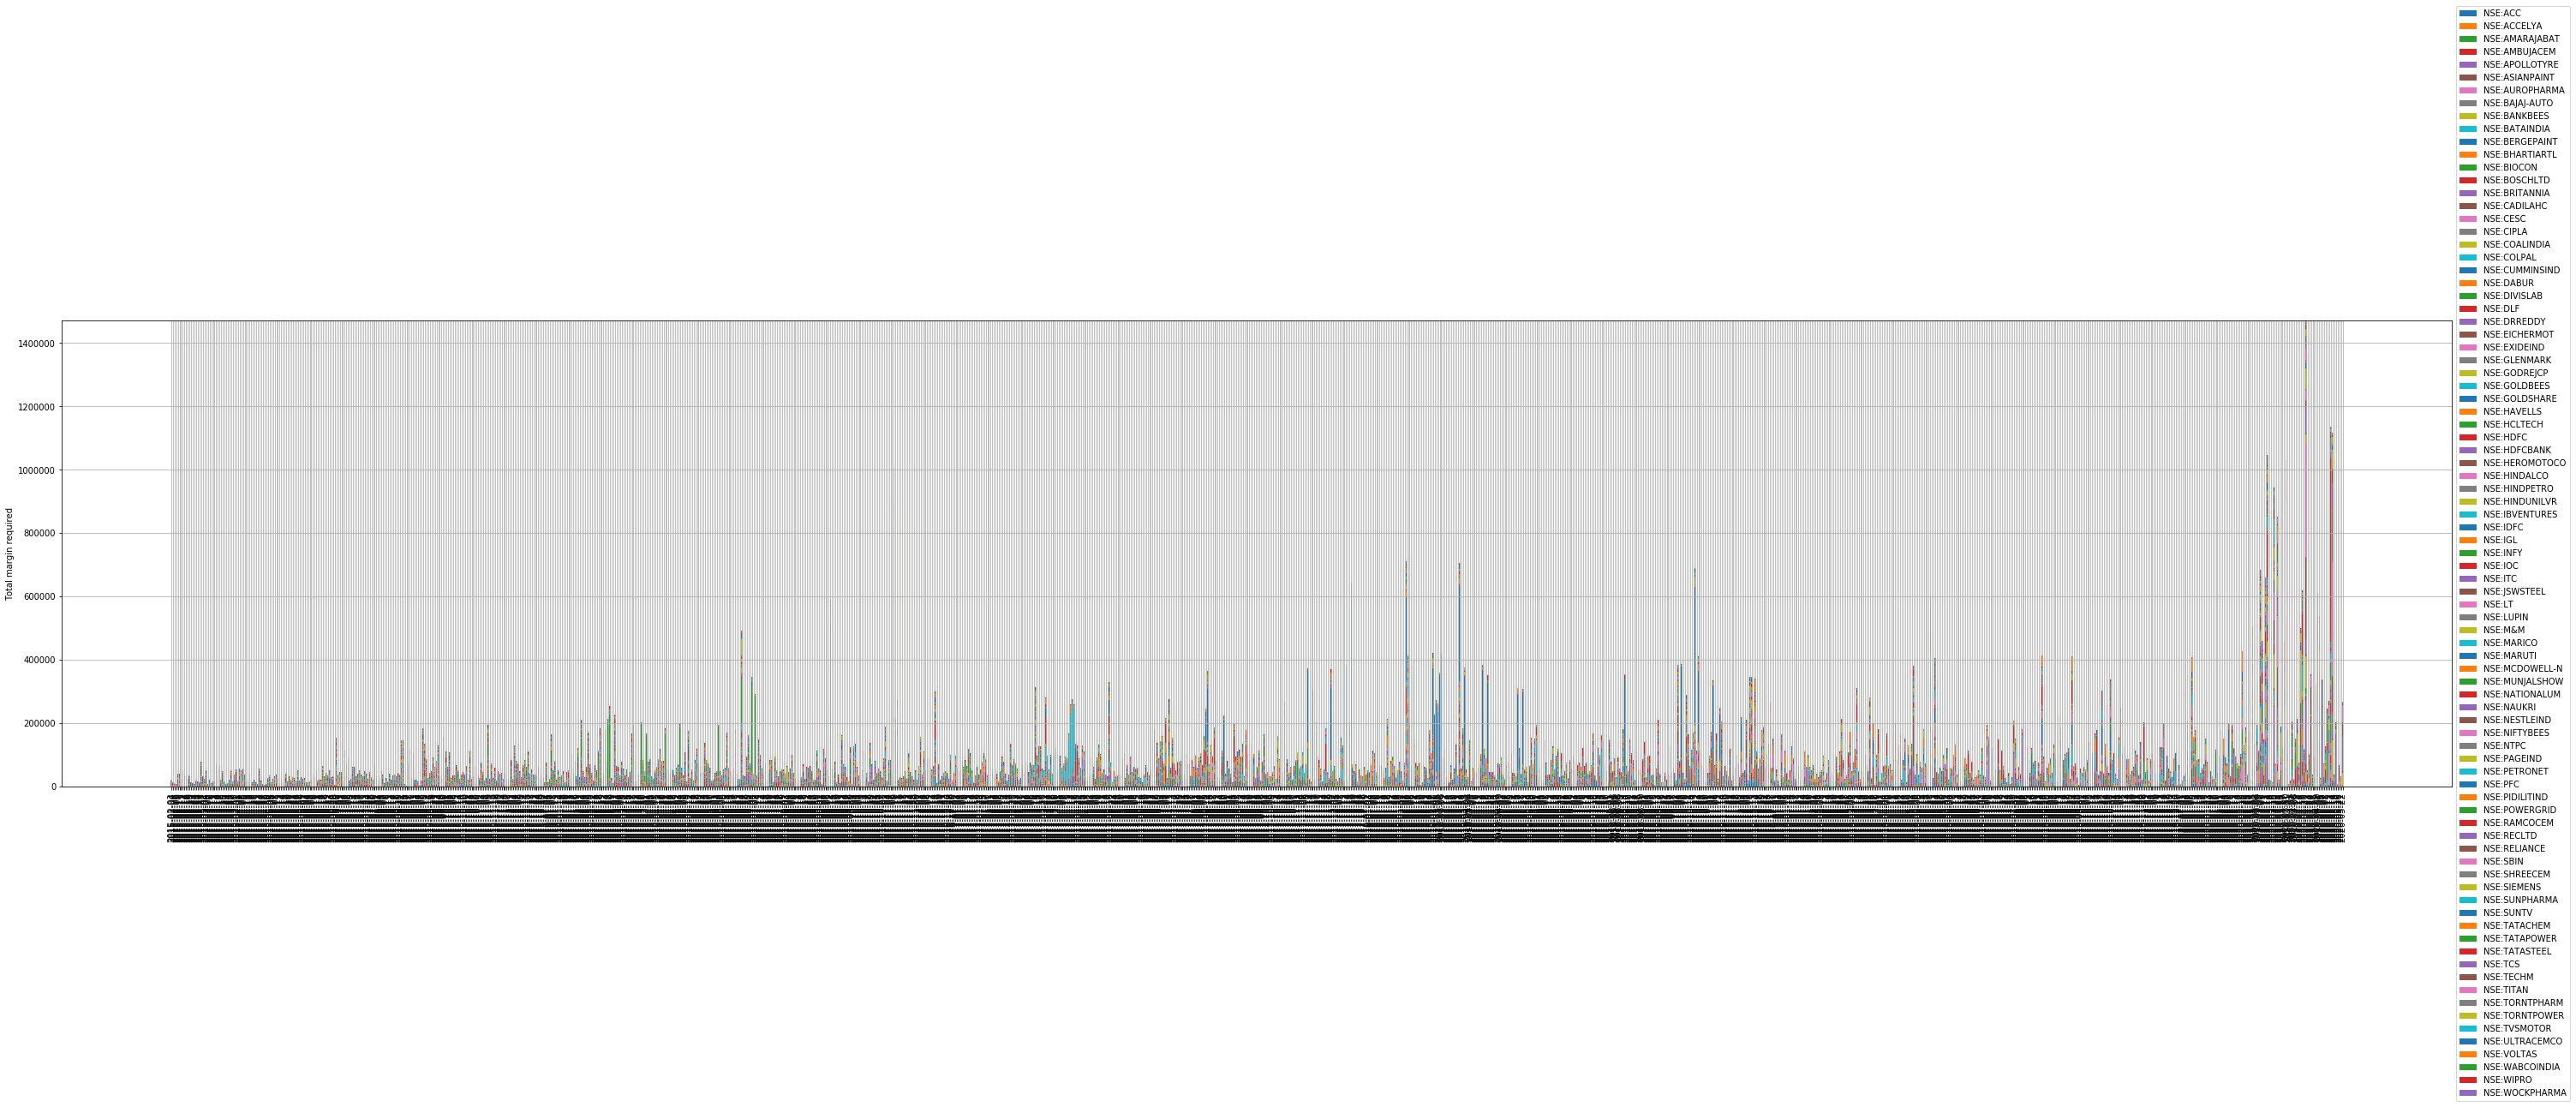

In [34]:
df2 = all_trades.groupby(['date', 'instrument'])['margin_required'].sum().unstack('instrument').fillna(0)

df = df2.transpose()

plt.figure(figsize=(50, 10))

series_labels = df.index.tolist()

data = df.values

category_labels = df.columns.tolist()

stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=False,
    value_format="{:.1f}",
    y_label="Total margin required"
)

plt.savefig('margin_required_opp_brokerage_return_newdata_trigger9_{}_{}.png'.format(begin, end))
plt.show()

## Brokerage Calculation

In [35]:
# brokerage = min(40, 0.0002 * budget_required)
# stt = 0.00025 * budget_required
# transaction_charges = 2 * 0.0000325 * budget_required
# gst = 0.18 * (brokerage + transaction_charges)
# sebi = 2 * 10 * budget_required/10000000
# total_tax_and_charges = brokerage + stt + transaction_charges + gst + sebi

# profit = profit - total_tax_and_charges

# Postmartem

In [36]:
all_trades[~all_trades['instrument'].isin(less_100)].instrument.nunique()

63

In [37]:
all_trades.instrument.nunique()

85

In [38]:
set(budget_df.instrument.unique().tolist())-set(all_trades.instrument.unique().tolist())

{'NSE:ICICIBANKN', 'NSE:LICNFNHGP', 'NSE:LINCOLN', 'NSE:MGL', 'NSE:NPBET'}

In [39]:
budget_df

,instrument,budget,return
0,NSE:ACCELYA,25000,0.05
1,NSE:GOLDBEES,25000,0.05
2,NSE:GOLDSHARE,25000,0.05
3,NSE:NIFTYBEES,25000,0.05
4,NSE:POWERGRID,25000,0.05
5,NSE:WIPRO,25000,0.05
6,NSE:BIOCON,25000,0.05
7,NSE:COLPAL,25000,0.05
8,NSE:WABCOINDIA,25000,0.05
9,NSE:ASIANPAINT,25000,0.05


In [40]:
new_budget = budget_df[~budget_df.instrument.isin(less_100)]

In [41]:
len(new_budget)

68

In [42]:
new_budget

,instrument,budget,return
4,NSE:POWERGRID,25000,0.05
5,NSE:WIPRO,25000,0.05
7,NSE:COLPAL,25000,0.05
9,NSE:ASIANPAINT,25000,0.05
10,NSE:DABUR,25000,0.05
11,NSE:HINDUNILVR,25000,0.05
12,NSE:NESTLEIND,25000,0.05
13,NSE:ICICIBANKN,25000,0.05
15,NSE:INFY,25000,0.05
16,NSE:LICNFNHGP,25000,0.05


In [43]:
low_trades[low_trades['budget_required']==low_trades['budget_required'].max()]

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,new_timestamp
3618,NSE:MUNJALSHOW,227.0,222.0,192.1,low,buy,35,27,25000.0,0.05,0.0,457772.39,47660,9155486.0,194.0,193.85,9.7,9.7,35,2016-11-09 09:21:00+05:30,SL,complete,462302.0,1.0,1,-4529.61,2016-11-09 03:51:00


In [44]:
low_trades[low_trades['instrument']=='NSE:ULTRACEMCO']

,instrument,high_prev,low_prev,open_today,condition,transaction_type,trade_number,level,budget,return,daily_khwab,actual_khwab,quantity,budget_required,price,trigger_price,squareoff,stoploss,order_id,timestamp,order_type,status,profit,pl_tag,flag,adhoora_khwab,new_timestamp
16582,NSE:ULTRACEMCO,3398.00,3292.50,3261.90,low,buy,1,1,25000.0,0.05,1250.0,1292.35,8,26095.20,3294.50,3291.25,164.7,164.7,1,2015-03-05 15:09:00+05:30,SL,complete,-827.20,-0.6,0,2119.55,2015-03-05 09:39:00
16586,NSE:ULTRACEMCO,2829.70,2750.90,2750.00,low,buy,2,2,25000.0,0.05,0.0,2191.36,16,44000.00,2777.50,2774.75,138.9,138.9,2,2015-03-26 15:09:00+05:30,SL,complete,501.60,0.2,0,1689.76,2015-03-26 09:39:00
16588,NSE:ULTRACEMCO,2707.80,2598.55,2595.65,low,buy,3,3,25000.0,0.05,0.0,1747.01,13,33743.45,2621.60,2619.00,131.1,131.1,3,2015-05-07 15:09:00+05:30,SL,complete,44.20,0.0,0,1702.81,2015-05-07 09:39:00
16589,NSE:ULTRACEMCO,2998.90,2924.80,2901.00,low,buy,4,4,25000.0,0.05,0.0,1760.50,12,34812.00,2930.00,2927.10,146.5,146.5,4,2015-05-26 15:09:00+05:30,SL,complete,-338.40,-0.2,0,2098.90,2015-05-26 09:39:00
16591,NSE:ULTRACEMCO,2921.00,2867.70,2825.00,low,buy,5,5,25000.0,0.05,0.0,2170.01,15,42375.00,2853.25,2850.40,142.7,142.7,5,2015-06-29 15:09:00+05:30,SL,complete,776.25,0.4,0,1393.76,2015-06-29 09:39:00
16594,NSE:ULTRACEMCO,3364.70,3209.00,3203.25,low,buy,6,6,25000.0,0.05,0.0,1440.98,9,28829.25,3235.30,3232.10,161.8,161.8,6,2015-07-22 15:09:00+05:30,SL,complete,144.00,0.1,0,1296.98,2015-07-22 09:39:00
16596,NSE:ULTRACEMCO,3258.00,3200.00,3196.00,low,buy,7,7,25000.0,0.05,0.0,1340.92,8,25568.00,3227.95,3224.75,161.4,161.4,7,2015-07-27 15:09:00+05:30,SL,complete,-716.80,-0.6,0,2057.72,2015-07-27 09:39:00
16598,NSE:ULTRACEMCO,3256.00,3201.35,3200.00,low,buy,8,8,25000.0,0.05,0.0,2127.44,13,41600.00,3232.00,3228.80,161.6,161.6,8,2015-08-07 15:09:00+05:30,SL,complete,-289.25,-0.1,0,2416.69,2015-08-07 09:39:00
16602,NSE:ULTRACEMCO,2955.30,2878.40,2868.95,low,buy,9,9,25000.0,0.05,0.0,2498.57,17,48772.15,2897.65,2894.75,144.9,144.9,9,2015-09-01 15:09:00+05:30,SL,complete,-1073.55,-0.4,0,3572.12,2015-09-01 09:39:00
16607,NSE:ULTRACEMCO,2785.00,2712.45,2700.00,low,buy,10,10,25000.0,0.05,0.0,3693.15,27,72900.00,2727.00,2724.30,136.4,136.4,10,2015-09-29 15:09:00+05:30,SL,complete,-186.30,-0.1,0,3879.45,2015-09-29 09:39:00
